# <center>BIKE RENTALS - DATA ANALYSIS</center>

![bike rent](https://fh-sites.imgix.net/sites/982/2023/06/15191919/2023-Banner_Woerndles-and-Madewells-Mountain-Biking009-scaled.jpg?auto=compress%2Cformat&w=1024&h=1024&fit=max)

## Content
1. [Introduction](#intro)
2. [Data Wrangling](#data)
3. [Data Analysis](#analysis)
4. [Data Visualization](#viz)

### Introduction
A bike-share company in Chicago needs to understand how casual riders and annual members use its bikes. Data Analysis insights will be useful to design a new marketing strategy to convert casual riders into annual members 

### 2. Data Wrangling <a  class="archor" id="data"> </a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

df = pd.read_csv("cyclistic_data.csv")
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,ride_length,month
0,AE2F1EF987F17A25,classic_bike,2022-01-03 16:52:00 UTC,2022-01-03 17:00:00 UTC,Milwaukee Ave & Wabansia Ave,13243,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,41.912616,-87.681391,41.901315,-87.677409,member,2,8,1
1,8D1DC19ED5848507,electric_bike,2022-01-04 13:40:00 UTC,2022-01-04 14:05:00 UTC,Dearborn St & Adams St,TA1305000005,Clark St & Wrightwood Ave,TA1305000014,41.878990,-87.629114,41.929546,-87.643118,casual,3,25,1
2,8F10848233142DB1,classic_bike,2022-01-12 14:20:00 UTC,2022-01-12 14:26:00 UTC,Southport Ave & Waveland Ave,13235,Broadway & Waveland Ave,13325,41.948150,-87.663940,41.949074,-87.648636,member,4,6,1
3,B4C791F7B38D3EF7,classic_bike,2022-01-02 12:35:00 UTC,2022-01-02 13:15:00 UTC,Ritchie Ct & Banks St,KA1504000134,Rush St & Cedar St,KA1504000133,41.906866,-87.626217,41.902309,-87.627691,member,1,40,1
4,0AC961DAEBB4CD14,classic_bike,2022-01-17 21:35:00 UTC,2022-01-17 21:48:00 UTC,Broadway & Waveland Ave,13325,Racine Ave & Fullerton Ave,TA1306000026,41.949074,-87.648636,41.925563,-87.658404,member,2,13,1


In [2]:
#Filtering relevant data
bike_data = df[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'end_station_name', 'member_casual', 'ride_length', 'month']]
bike_data.tail(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,month
5901458,0AF380B9176F30E7,classic_bike,2021-12-10 10:06:00 UTC,2021-12-10 11:35:00 UTC,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,casual,89,12
5901459,DE479AF7CFF116C1,docked_bike,2021-12-29 12:30:00 UTC,2021-12-29 12:43:00 UTC,Adler Planetarium,DuSable Lake Shore Dr & Monroe St,casual,13,12
5901460,5F7882FA58CB22AB,classic_bike,2021-12-13 16:18:00 UTC,2021-12-13 16:32:00 UTC,Shedd Aquarium,DuSable Lake Shore Dr & Monroe St,casual,14,12
5901461,A29F6E90C1F9EF1D,electric_bike,2021-12-26 13:45:00 UTC,2021-12-26 14:11:00 UTC,Millennium Park,DuSable Lake Shore Dr & Monroe St,casual,26,12
5901462,CDCCA95ED28C2C87,classic_bike,2021-12-22 16:21:00 UTC,2021-12-22 16:58:00 UTC,DuSable Lake Shore Dr & North Blvd,DuSable Lake Shore Dr & North Blvd,member,37,12


In [3]:
bike_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    860786
end_station_name      919896
member_casual              0
ride_length                0
month                      0
dtype: int64

### 3. EDA <a class="archor" id="analysis"></a>

In [4]:
bike_data.describe()

,ride_length,month
count,5.901463e+06,5.901463e+06
mean,1.988998e+01,7.236964e+00
std,1.479859e+02,2.568967e+00
min,-1.380000e+02,1.000000e+00
25%,6.000000e+00,5.000000e+00
50%,1.100000e+01,7.000000e+00
75%,2.000000e+01,9.000000e+00
max,4.162900e+04,1.200000e+01


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901463 entries, 0 to 5901462
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   end_station_name    object
 6   member_casual       object
 7   ride_length         int64 
 8   month               int64 
dtypes: int64(2), object(7)
memory usage: 405.2+ MB


In [6]:
bike_data.member_casual.value_counts()

member    3379237
casual    2522226
Name: member_casual, dtype: int64

In [7]:
bike_users= bike_data.member_casual.value_counts().apply(lambda x: x / len(bike_data.member_casual) * 100).round(2)
bike_users

member    57.26
casual    42.74
Name: member_casual, dtype: float64

In [8]:
popular_bikes = bike_data.rideable_type.value_counts().apply(lambda x: x / len(bike_data.rideable_type) * 100).round(2)
popular_bikes

classic_bike     51.78
electric_bike    44.38
docked_bike       3.84
Name: rideable_type, dtype: float64

In [9]:
monthly_use = bike_data.groupby(["month"]).sum()
monthly_use

,ride_length
month,
1,1584021
2,1646330
3,5254113
4,6547011
5,13394701
6,17447103
7,17614768
8,17402205
9,15510051


In [10]:
bike_use = bike_data.groupby(["month"])['member_casual'].value_counts().unstack(1)
bike_use

member_casual,casual,member
month,,
1,18520,85250
2,21416,94193
3,89882,194160
4,126417,244832
5,280415,354443
6,369051,400153
7,406055,417433
8,412671,391681
9,363890,392257


In [31]:
bike_data.start_station_name.value_counts().head(5)

Streeter Dr & Grand Ave               80414
DuSable Lake Shore Dr & North Blvd    45413
Michigan Ave & Oak St                 43199
DuSable Lake Shore Dr & Monroe St     43113
Wells St & Concord Ln                 42448
Name: start_station_name, dtype: int64

In [12]:
bike_data.end_station_name.value_counts().head(5)

Streeter Dr & Grand Ave               80767
DuSable Lake Shore Dr & North Blvd    49319
Michigan Ave & Oak St                 43609
Wells St & Concord Ln                 42350
DuSable Lake Shore Dr & Monroe St     41691
Name: end_station_name, dtype: int64

In [13]:
# Convert the date column to a datetime object
#bike_data['datetime'] = pd.to_datetime(bike_data["started_at"])

#Extract the hour from the datetime object
#bike_data['hour'] = bike_data['datetime'].dt.hour

# Group the data by the hour
#hour_grouped = bike_data.groupby(["hour"]).count_values()
#average_hour = hour_grouped["value"].mean()
#sorted_values = average_hour.sort_values(ascending=False)
#sorted_values

### 4. Data Visualization <a class="archor" id="viz"></a>


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

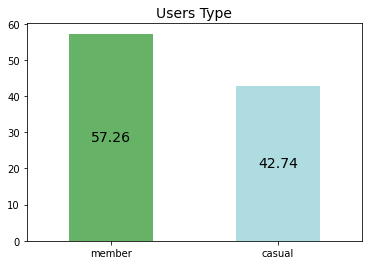

In [15]:
# Create a barplot
bike_users.plot(kind='bar',alpha=0.6, rot=0, color=['green', '#7AC5CD'])
plt.title("Users Type", fontsize=14)
# Iterate over the bars and annotate the text
for i, bar in enumerate(plt.gca().patches):
    plt.annotate(str(bar.get_height()), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2), ha='center', va='center', fontsize=14)
plt.show()

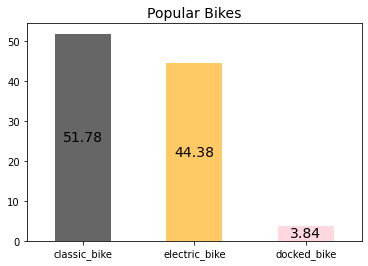

In [16]:
# Create a barplot
popular_bikes.plot(kind='bar',alpha=0.6, rot=0, color=['black', 'orange', 'pink'])
plt.title("Popular Bikes", fontsize=14)
# Iterate over the bars and annotate the text
for i, bar in enumerate(plt.gca().patches):
    plt.annotate(str(bar.get_height()), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2), ha='center', va='center', fontsize=14)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

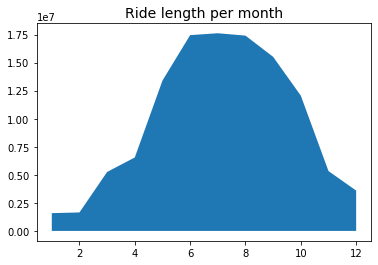

In [17]:
#monthly_use.plot(kind="fill_between")
plt.fill_between(monthly_use.index, monthly_use.ride_length)
plt.title("Ride length per month", fontsize=14)
plt.show

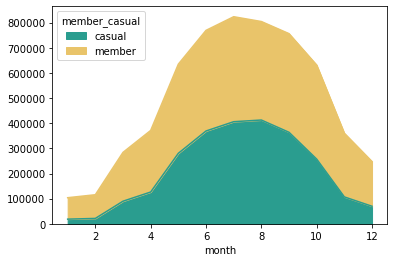

In [18]:
bike_use.plot.area(color={'casual':'#2a9d8f', 'member':'#e9c46a'})
plt.show()

In [19]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
stopwords = set(STOPWORDS)

In [21]:
text = " ".join(review for review in bike_data.start_station_name.astype(str))

In [22]:
print ("There are {} words in the combination of all cells in column YOUR_COLUMN_NAME.".format(len(text)))

There are 129044430 words in the combination of all cells in column YOUR_COLUMN_NAME.


In [33]:
stopwords.update(["nan"])

In [24]:
# instantiate a word cloud object
wordcloud = WordCloud(stopwords=stopwords, width=4000, height=2000).generate(text)

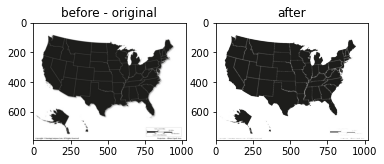

In [25]:
# a.  open and read image file
image_file = Image.open("USA.jpg")


# b. convert image file to RGBA values
image_rgba = image_file.convert("RGBA")
image_data = image_rgba.getdata()


# c. convert values above threshold to white, 255 (white background)
threshold = 150
new_image = []

for x in image_data:
    if x[0] > threshold:
        new_image.append((255,255,255,1))  # white
    else:
        new_image.append(x)

image_rgba.putdata(new_image)


#  d.  create MASK image with 'after' RGBA values
image_mask = np.array(image_rgba)


#  e.  plot before and after
plt.subplot(121)
plt.imshow(image_file)
plt.title('before - original')
plt.subplot(122)
plt.imshow(image_rgba)
plt.title('after')
plt.show()

In [26]:
mask2 = np.array(Image.open("USA.jpg"))
mask3 = np.where(mask2==0, 255, mask2)

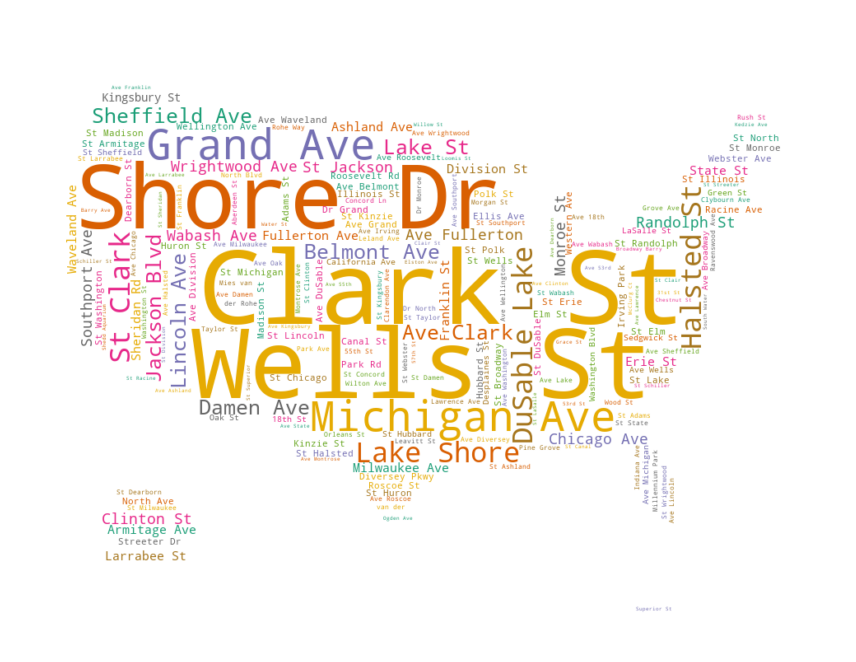

In [35]:
wordcloud = WordCloud(width = 1200, height = 1200,      # resolution
                colormap = 'Dark2',                    # font colors from palette
                background_color ='white',              # background color
                stopwords = stopwords,                  # remove common words
                normalize_plurals = True,               # plurals to singular
                repeat = True,                          # repeat words
                mask = mask2).generate(text)  # image MASK with white background


#  3.  plot WordCloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()  # fillout figure size
plt.show()